# Exercise 4: Extracting Quantitative Measures from EEG spectra 

### This exercise makes use of data from the paper 

### Dissociable Decoding of Working Memory and Spatial Attention from EEG Oscillations and Sustained Potentials"

#### Bae, G. Y., & Luck, S. J. (2018). Dissociable Decoding of Spatial Attention and Working Memory from EEG Oscillations and Sustained Potentials. Journal of Neuroscience, 38(2), 409-422.

#### The paper is available in the readings folder.  

## This data set is potentially a very good data set to use for your final project as it is information rich. 

#### Having said that, I dislike many aspects of the paper.  

#### Load modules that we need 

In [3]:
import numpy as np 
from matplotlib import pyplot as plt
from hdf5storage import loadmat, savemat 
from scipy.fftpack import fft 
from scipy import signal



In [4]:
data = loadmat('data/wm_orientation_506.mat')



In [5]:
data.keys()


dict_keys(['angle', 'channel', 'channel_names', 'eeg', 'response', 'samplingrate', 'time'])

In [6]:
#extract the variables from the dictionary 
eeg = data['eeg']
channel_names = data['channel_names']
angle = np.int16(data['angle'][0])
response = np.int16(data['response'][0])
samplingrate = int(data['samplingrate'][0])
time = np.int16(data['time'][0])
stimsamp = 375 #I looked at time to figure this out.  
ntrials = eeg.shape[0]
nchannels = eeg.shape[1]
nsamps = eeg.shape[2]

## README 

![Experiment](img/BaeLuckFigure1.jpg)

### In this experiment, participants are presented tear drops of different orientation for 200 ms.  

### After a delay period of 1300 ms, they rotate an arrow to match the orientation presented. 

### The data presented includes 1500 ms before the stimulus presented, 200 ms of stimulus presentation and 1300 ms of hold period. 

### The response period is not included. 

###  The variables contained here are 


*   `samplingrate` - number of samples of EEG in per second
*   `eeg` - eegdata of the experiment.  of dimensions, ntrials x nchannels x ntimepoints.  The EEG is provided in units of volts. 
*   `time` - the time relative to *stimulus onset* in each EEG observation.
*   `channel_names` - the name of the EEG channels indicating where it is located.    
*   `angle` - the angle of the teardrop stimulus  
*   `response` - the angle reported by the subject. 



## Problem #1


#### In the tutorial example. we compared the response when the task was to remember an angle of 0 degrees to the response when the angle was 180 degrees using 1 second after the stimulus presentation

`poststim = range(375,625,1)`

#### However, during this interval, the stimulus is presented on the screen for the first 200 ms (50 samples at a sampling rate of 250), so we may just be differentiating the response to the stimulus rather than working memory. The most task relevant interval would be the period just prior to the response, when they are holding the item in memory and preparing to make a response. 

#### a. Divide the 1.5 sec interval (375 samples) after stimulus presentation into 3 intervals of length 0.5 second (125 samples) and compute the average amplitude spectrum for each angle from 0 to 360 for each of the 3 intervals.  So there are 3 intervals 

* 0 -0.5s, samples 375-500
* 0.5 -1s, samples 500-625
* 1 -1.5s, samples 625- 750

#### b. For visualization, we will focus on PO7 and PO8 over the left and right hemispheres respectively, and the angles 0 and 180 which are pointing to the left and right.   For each of the three intervals, make a separate graph for PO7 and PO8 plotting the amplitude spectrum of the EEG for stimuli in memory at angle 0 and angle 180.  

#### c. Extract the amplitude values at 10 Hz for all 27 channels in the interval using the amplitude spectrum computed from the interval from 1-1.5s.  Following the tutorial make a plot of the amplitude at each channel at 10 Hz.   

In [11]:
#first interval 
poststim = range(375,500,1)
T = len(poststim)/samplingrate
nsamp = len(poststim)
deltaf = 1/T
nf = int(nsamp/2) 
f = np.arange(0,nf)*deltaf
eeg_fft = fft(eeg[:,:,poststim], axis = 2) # fft of the eeg data going following the incrementes of poststim 
amplitude = 2*np.abs(eeg_fft)/nsamp/deltaf

amplitude_by_angle_1 = dict ()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle_1[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)

#second interval
poststim =range(500,625,1)
T = len(poststim)/samplingrate
nsamp = len(poststim)
deltaf = 1/T
nf = int(nsamp/2) 
f = np.arange(0,nf)*deltaf
eeg_fft = fft(eeg[:,:,poststim], axis = 2) # fft of the eeg data going following the incrementes of poststim 
amplitude = 2*np.abs(eeg_fft)/nsamp/deltaf

amplitude_by_angle_2 = dict ()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle_2[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)

# third interval. 
poststim = range(625,750,1)
poststim =range(500,625,1)
T = len(poststim)/samplingrate
nsamp = len(poststim)
deltaf = 1/T
nf = int(nsamp/2) 
f = np.arange(0,nf)*deltaf
eeg_fft = fft(eeg[:,:,poststim], axis = 2) # fft of the eeg data going following the incrementes of poststim 
amplitude = 2*np.abs(eeg_fft)/nsamp/deltaf

amplitude_by_angle_3 = dict ()
angle_values = np.unique(angle)
for j in range(len(angle_values)):
    amplitude_by_angle_3[angle_values[j]] = np.mean(amplitude[angle == angle_values[j],:,:],axis = 0)


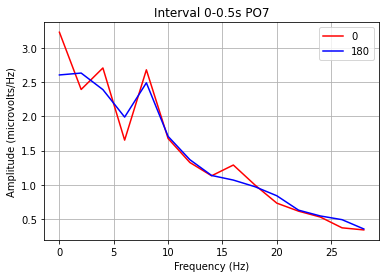

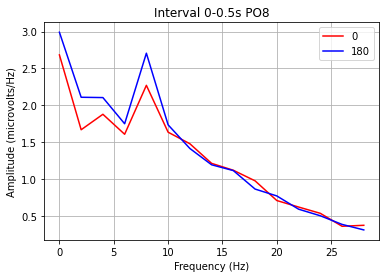

In [13]:
nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf

plt.plot(f[range(nf)],amplitude_by_angle_1[0][11,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_1[180][11,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[11])
plt.show()

plt.plot(f[range(nf)],amplitude_by_angle_1[0][25,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_1[180][25,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[25])
plt.show()

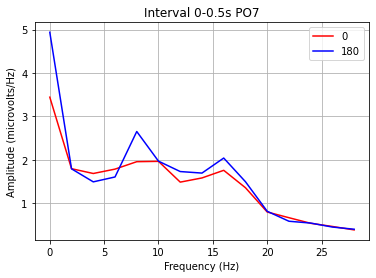

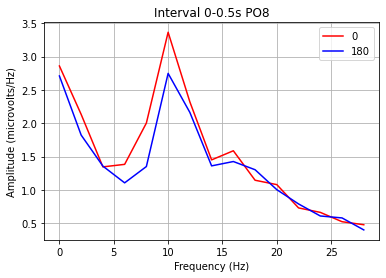

In [14]:

nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf

plt.plot(f[range(nf)],amplitude_by_angle_2[0][11,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_2[180][11,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[11])
plt.show()

plt.plot(f[range(nf)],amplitude_by_angle_2[0][25,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_2[180][25,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[25])
plt.show()

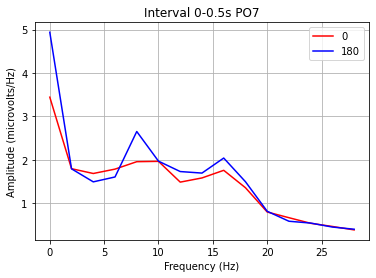

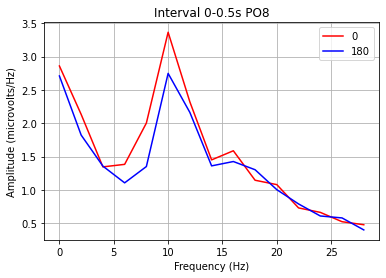

In [15]:
nf = 15 #since deltaf is 2, this takes it to 30 Hz 
f = np.arange(0,nf)*deltaf

plt.plot(f[range(nf)],amplitude_by_angle_3[0][11,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_3[180][11,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[11])
plt.show()

plt.plot(f[range(nf)],amplitude_by_angle_3[0][25,range(nf)],'r')
plt.plot(f[range(nf)],amplitude_by_angle_3[180][25,range(nf)],'b')
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.legend((0,180))
plt.title('Interval 0-0.5s ' + channel_names[25])
plt.show()

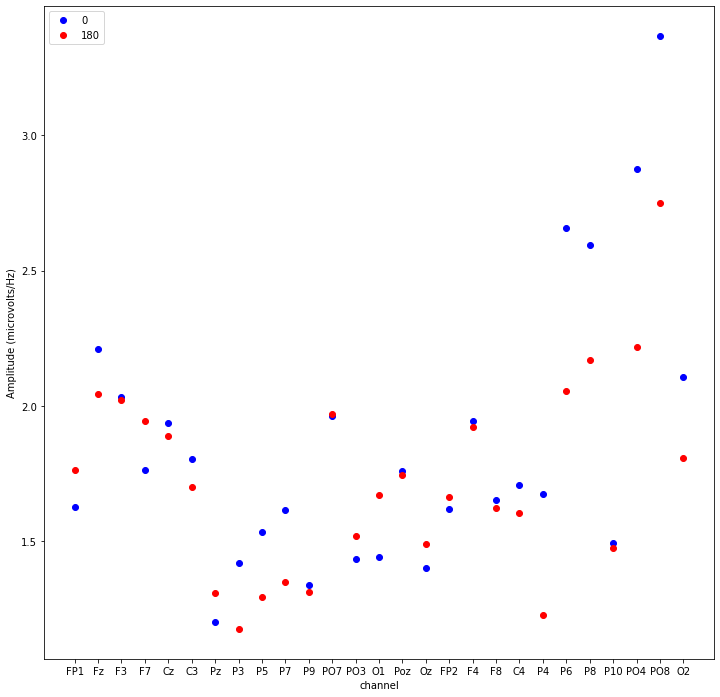

In [22]:
frequency = 10 
bin = int(frequency/deltaf)
amplitude_0 = amplitude_by_angle_3[0][:, bin]
amplitude_180 = amplitude_by_angle_3[180][:, bin]

plt.figure(figsize = (12,12))
plt.plot(range(nchannels),amplitude_0,'bo')
plt.plot(range(nchannels),amplitude_180,'ro')
plt.xlabel('channel')
plt.ylabel('Amplitude (microvolts/Hz)')
plt.xticks(range(nchannels), labels = channel_names)
plt.legend((0,180))
plt.show()
